# DATA FOOT BET


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##SAISON 18-19

In [5]:
#importation des données, création de la classe Team

data = pd.read_csv ("/content/drive/MyDrive/data_foot/season18-19.csv", delimiter=",")

name_list = []

for k in range(10):
  name_list.append(data.loc[k,'HomeTeam'])
  name_list.append(data.loc[k,'AwayTeam'])

name_list

class Team:
  def __init__(self,name):
    self.name = name
    self.matchs = []
    self.rank = []
    self.points = [0]

  def add_match(self,match):
    self.matchs.append(match)

  def add_rank(self,rank):
    self.rank.append(rank)  
  
  def update_points(self,pt):
    self.points.append(pt)

Team_list = []

for name in name_list:
  x = Team(name)
  Team_list.append(x)

def find(name):
  for x in Team_list:
    if x.name == name:
      return x


In [6]:
# On rentre toutes les données dans la class Team

for k in range(len(data)):   #On remplit les victoires et défaites et le nombre de points à chaque journée pour chaque team
  result = data.loc[k,'FTR']
  home = find(data.loc[k,'HomeTeam'])
  away = find(data.loc[k,'AwayTeam'])
  if result == 'H':
    home.add_match('V')
    home.update_points(home.points[-1] + 3)
    away.add_match('D')
    away.update_points(away.points[-1])
  if result == 'A':
    home.add_match('D')
    home.update_points(home.points[-1])
    away.add_match('V')
    away.update_points(away.points[-1] + 3)
  if result == 'D':
    home.add_match('N')
    home.update_points(home.points[-1] + 1)
    away.add_match('N')
    away.update_points(away.points[-1] + 1)

def quick_sort(L,f):
  if L == []:
    return L
  elif len(L) == 1:
    return L
  else:
    p = L[0]
    L1 = []
    L2 = []
    for k in range(1,len(L)):
      if f(L[k]) > f(p):
        L2.append(L[k])
      else:
        L1.append(L[k])
    return quick_sort(L1,f)+[p]+quick_sort(L2,f)


for k in range(1,38):
  def points(x):
    return x.points[k]
  Team_list=quick_sort(Team_list,points)
  for i in range(20):
    Team_list[i].add_rank(20-i)



In [7]:
## Création du set d'entraînement

X_train = np.empty((350,10))
Y_train = np.empty(350)

start = 30

def transform(r):
  if r == "V":
    return 1
  elif r == "D":
    return -1
  else:
    return 0

for k in range(start,380):
  result = data.loc[k,'FTR']
  home = find(data.loc[k,'HomeTeam'])
  away = find(data.loc[k,'AwayTeam'])
  X_train[k-start,:5] = [home.rank[k//10-1],home.points[k//10],transform(home.matchs[k//10-3]),transform(home.matchs[k//10-2]),transform(home.matchs[k//10-1])]
  X_train[k-start,5:] = [away.rank[k//10-1],away.points[k//10],transform(away.matchs[k//10-3]),transform(away.matchs[k//10-2]),transform(away.matchs[k//10-1])]
  if result == "H":
    Y_train[k-start] = 0
  elif result == "D":
    Y_train[k-start] = 1
  else:
    Y_train[k-start] = 2

X = np.copy(X_train)
Y = np.copy(Y_train)

## Saison 12-13

In [8]:
#importation des données, création de la classe Team

data = pd.read_csv ("/content/drive/MyDrive/data_foot/season12-13.csv", delimiter=",")

name_list = []

for k in range(10):
  name_list.append(data.loc[k,'HomeTeam'])
  name_list.append(data.loc[k,'AwayTeam'])


Team_list = []

for name in name_list:
  x = Team(name)
  Team_list.append(x)

for k in range(len(data)):   #On remplit les victoires et défaites et le nombre de points à chaque journée pour chaque team
  result = data.loc[k,'FTR']
  home = find(data.loc[k,'HomeTeam'])
  away = find(data.loc[k,'AwayTeam'])
  if result == 'H':
    home.add_match('V')
    home.update_points(home.points[-1] + 3)
    away.add_match('D')
    away.update_points(away.points[-1])
  if result == 'A':
    home.add_match('D')
    home.update_points(home.points[-1])
    away.add_match('V')
    away.update_points(away.points[-1] + 3)
  if result == 'D':
    home.add_match('N')
    home.update_points(home.points[-1] + 1)
    away.add_match('N')
    away.update_points(away.points[-1] + 1)

def quick_sort(L,f):
  if L == []:
    return L
  elif len(L) == 1:
    return L
  else:
    p = L[0]
    L1 = []
    L2 = []
    for k in range(1,len(L)):
      if f(L[k]) > f(p):
        L2.append(L[k])
      else:
        L1.append(L[k])
    return quick_sort(L1,f)+[p]+quick_sort(L2,f)


for k in range(1,38):
  def points(x):
    return x.points[k]
  Team_list=quick_sort(Team_list,points)
  for i in range(20):
    Team_list[i].add_rank(20-i)

X_train = np.empty((350,10))
Y_train = np.empty(350)

start = 30

def transform(r):
  if r == "V":
    return 1
  elif r == "D":
    return -1
  else:
    return 0

for k in range(start,380):
  result = data.loc[k,'FTR']
  home = find(data.loc[k,'HomeTeam'])
  away = find(data.loc[k,'AwayTeam'])
  X_train[k-start,:5] = [home.rank[k//10-1],home.points[k//10],transform(home.matchs[k//10-3]),transform(home.matchs[k//10-2]),transform(home.matchs[k//10-1])]
  X_train[k-start,5:] = [away.rank[k//10-1],away.points[k//10],transform(away.matchs[k//10-3]),transform(away.matchs[k//10-2]),transform(away.matchs[k//10-1])]
  if result == "H":
    Y_train[k-start] = 0
  elif result == "D":
    Y_train[k-start] = 1
  else:
    Y_train[k-start] = 2


X = np.concatenate((X,X_train),axis = 0)
Y = np.concatenate((Y,Y_train),axis = 0)


## Saison 11-12

In [9]:
#importation des données, création de la classe Team

data = pd.read_csv ("/content/drive/MyDrive/data_foot/season11-12.csv", delimiter=",")

name_list = []

for k in range(10):
  name_list.append(data.loc[k,'HomeTeam'])
  name_list.append(data.loc[k,'AwayTeam'])


Team_list = []

for name in name_list:
  x = Team(name)
  Team_list.append(x)

for k in range(len(data)):   #On remplit les victoires et défaites et le nombre de points à chaque journée pour chaque team
  result = data.loc[k,'FTR']
  home = find(data.loc[k,'HomeTeam'])
  away = find(data.loc[k,'AwayTeam'])
  if result == 'H':
    home.add_match('V')
    home.update_points(home.points[-1] + 3)
    away.add_match('D')
    away.update_points(away.points[-1])
  if result == 'A':
    home.add_match('D')
    home.update_points(home.points[-1])
    away.add_match('V')
    away.update_points(away.points[-1] + 3)
  if result == 'D':
    home.add_match('N')
    home.update_points(home.points[-1] + 1)
    away.add_match('N')
    away.update_points(away.points[-1] + 1)

def quick_sort(L,f):
  if L == []:
    return L
  elif len(L) == 1:
    return L
  else:
    p = L[0]
    L1 = []
    L2 = []
    for k in range(1,len(L)):
      if f(L[k]) > f(p):
        L2.append(L[k])
      else:
        L1.append(L[k])
    return quick_sort(L1,f)+[p]+quick_sort(L2,f)


for k in range(1,38):
  def points(x):
    return x.points[k]
  Team_list=quick_sort(Team_list,points)
  for i in range(20):
    Team_list[i].add_rank(20-i)

X_train = np.empty((350,10))
Y_train = np.empty(350)

start = 30

def transform(r):
  if r == "V":
    return 1
  elif r == "D":
    return -1
  else:
    return 0

for k in range(start,380):
  result = data.loc[k,'FTR']
  home = find(data.loc[k,'HomeTeam'])
  away = find(data.loc[k,'AwayTeam'])
  X_train[k-start,:5] = [home.rank[k//10-1],home.points[k//10],transform(home.matchs[k//10-3]),transform(home.matchs[k//10-2]),transform(home.matchs[k//10-1])]
  X_train[k-start,5:] = [away.rank[k//10-1],away.points[k//10],transform(away.matchs[k//10-3]),transform(away.matchs[k//10-2]),transform(away.matchs[k//10-1])]
  if result == "H":
    Y_train[k-start] = 0
  elif result == "D":
    Y_train[k-start] = 1
  else:
    Y_train[k-start] = 2


X = np.concatenate((X,X_train),axis = 0)
Y = np.concatenate((Y,Y_train),axis = 0)

## Saison 16-17

In [10]:
#importation des données, création de la classe Team

data = pd.read_csv ("/content/drive/MyDrive/data_foot/season16-17.csv", delimiter=",")

name_list = []

for k in range(10):
  name_list.append(data.loc[k,'HomeTeam'])
  name_list.append(data.loc[k,'AwayTeam'])


Team_list = []

for name in name_list:
  x = Team(name)
  Team_list.append(x)

for k in range(len(data)):   #On remplit les victoires et défaites et le nombre de points à chaque journée pour chaque team
  result = data.loc[k,'FTR']
  home = find(data.loc[k,'HomeTeam'])
  away = find(data.loc[k,'AwayTeam'])
  if result == 'H':
    home.add_match('V')
    home.update_points(home.points[-1] + 3)
    away.add_match('D')
    away.update_points(away.points[-1])
  if result == 'A':
    home.add_match('D')
    home.update_points(home.points[-1])
    away.add_match('V')
    away.update_points(away.points[-1] + 3)
  if result == 'D':
    home.add_match('N')
    home.update_points(home.points[-1] + 1)
    away.add_match('N')
    away.update_points(away.points[-1] + 1)

def quick_sort(L,f):
  if L == []:
    return L
  elif len(L) == 1:
    return L
  else:
    p = L[0]
    L1 = []
    L2 = []
    for k in range(1,len(L)):
      if f(L[k]) > f(p):
        L2.append(L[k])
      else:
        L1.append(L[k])
    return quick_sort(L1,f)+[p]+quick_sort(L2,f)


for k in range(1,38):
  def points(x):
    return x.points[k]
  Team_list=quick_sort(Team_list,points)
  for i in range(20):
    Team_list[i].add_rank(20-i)

X_train = np.empty((350,10))
Y_train = np.empty(350)

start = 30

def transform(r):
  if r == "V":
    return 1
  elif r == "D":
    return -1
  else:
    return 0

for k in range(start,380):
  result = data.loc[k,'FTR']
  home = find(data.loc[k,'HomeTeam'])
  away = find(data.loc[k,'AwayTeam'])
  X_train[k-start,:5] = [home.rank[k//10-1],home.points[k//10],transform(home.matchs[k//10-3]),transform(home.matchs[k//10-2]),transform(home.matchs[k//10-1])]
  X_train[k-start,5:] = [away.rank[k//10-1],away.points[k//10],transform(away.matchs[k//10-3]),transform(away.matchs[k//10-2]),transform(away.matchs[k//10-1])]
  if result == "H":
    Y_train[k-start] = 0
  elif result == "D":
    Y_train[k-start] = 1
  else:
    Y_train[k-start] = 2


X = np.concatenate((X,X_train),axis = 0)
Y = np.concatenate((Y,Y_train),axis = 0)


## Saison 14-15

In [11]:
#importation des données, création de la classe Team

data = pd.read_csv ("/content/drive/MyDrive/data_foot/season14-15.csv", delimiter=",")

name_list = []

for k in range(10):
  name_list.append(data.loc[k,'HomeTeam'])
  name_list.append(data.loc[k,'AwayTeam'])


Team_list = []

for name in name_list:
  x = Team(name)
  Team_list.append(x)

for k in range(len(data)):   #On remplit les victoires et défaites et le nombre de points à chaque journée pour chaque team
  result = data.loc[k,'FTR']
  home = find(data.loc[k,'HomeTeam'])
  away = find(data.loc[k,'AwayTeam'])
  if result == 'H':
    home.add_match('V')
    home.update_points(home.points[-1] + 3)
    away.add_match('D')
    away.update_points(away.points[-1])
  if result == 'A':
    home.add_match('D')
    home.update_points(home.points[-1])
    away.add_match('V')
    away.update_points(away.points[-1] + 3)
  if result == 'D':
    home.add_match('N')
    home.update_points(home.points[-1] + 1)
    away.add_match('N')
    away.update_points(away.points[-1] + 1)

def quick_sort(L,f):
  if L == []:
    return L
  elif len(L) == 1:
    return L
  else:
    p = L[0]
    L1 = []
    L2 = []
    for k in range(1,len(L)):
      if f(L[k]) > f(p):
        L2.append(L[k])
      else:
        L1.append(L[k])
    return quick_sort(L1,f)+[p]+quick_sort(L2,f)


for k in range(1,38):
  def points(x):
    return x.points[k]
  Team_list=quick_sort(Team_list,points)
  for i in range(20):
    Team_list[i].add_rank(20-i)

X_train = np.empty((350,10))
Y_train = np.empty(350)

start = 30

def transform(r):
  if r == "V":
    return 1
  elif r == "D":
    return -1
  else:
    return 0

for k in range(start,380):
  result = data.loc[k,'FTR']
  home = find(data.loc[k,'HomeTeam'])
  away = find(data.loc[k,'AwayTeam'])
  X_train[k-start,:5] = [home.rank[k//10-1],home.points[k//10],transform(home.matchs[k//10-3]),transform(home.matchs[k//10-2]),transform(home.matchs[k//10-1])]
  X_train[k-start,5:] = [away.rank[k//10-1],away.points[k//10],transform(away.matchs[k//10-3]),transform(away.matchs[k//10-2]),transform(away.matchs[k//10-1])]
  if result == "H":
    Y_train[k-start] = 0
  elif result == "D":
    Y_train[k-start] = 1
  else:
    Y_train[k-start] = 2

X = np.concatenate((X,X_train),axis = 0)
Y = np.concatenate((Y,Y_train),axis = 0)

In [12]:
## Entraînement

model = tf.keras.models.Sequential([
   tf.keras.Input(shape=(10,)),
   tf.keras.layers.Dense(16, activation='relu'),
   tf.keras.layers.Dense(16, activation='relu'),
   tf.keras.layers.Dense(3),
   tf.keras.layers.Softmax() 
])

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [13]:
print("Fit model on training data")
history = model.fit(
    X,
    Y,
    batch_size=50,
    epochs=1000,)

Fit model on training data
Epoch 1/1000
35/35 [==============================] - 1s 2ms/step - loss: 2.0419 - sparse_categorical_accuracy: 0.3451
Epoch 2/1000
35/35 [==============================] - 0s 2ms/step - loss: 1.2437 - sparse_categorical_accuracy: 0.4326
Epoch 3/1000
35/35 [==============================] - 0s 1ms/step - loss: 1.1076 - sparse_categorical_accuracy: 0.4451
Epoch 4/1000
35/35 [==============================] - 0s 2ms/step - loss: 1.0818 - sparse_categorical_accuracy: 0.4571
Epoch 5/1000
35/35 [==============================] - 0s 1ms/step - loss: 1.0633 - sparse_categorical_accuracy: 0.4674
Epoch 6/1000
35/35 [==============================] - 0s 1ms/step - loss: 1.0652 - sparse_categorical_accuracy: 0.4691
Epoch 7/1000
35/35 [==============================] - 0s 2ms/step - loss: 1.0502 - sparse_categorical_accuracy: 0.4806
Epoch 8/1000
35/35 [==============================] - 0s 1ms/step - loss: 1.0414 - sparse_categorical_accuracy: 0.4806
Epoch 9/1000
35/35 [=

## Saison 17-18

In [14]:
#importation des données, création de la classe Team

data = pd.read_csv ("/content/drive/MyDrive/data_foot/season12-13.csv", delimiter=",")

name_list = []

for k in range(10):
  name_list.append(data.loc[k,'HomeTeam'])
  name_list.append(data.loc[k,'AwayTeam'])


Team_list = []

for name in name_list:
  x = Team(name)
  Team_list.append(x)

for k in range(len(data)):   #On remplit les victoires et défaites et le nombre de points à chaque journée pour chaque team
  result = data.loc[k,'FTR']
  home = find(data.loc[k,'HomeTeam'])
  away = find(data.loc[k,'AwayTeam'])
  if result == 'H':
    home.add_match('V')
    home.update_points(home.points[-1] + 3)
    away.add_match('D')
    away.update_points(away.points[-1])
  if result == 'A':
    home.add_match('D')
    home.update_points(home.points[-1])
    away.add_match('V')
    away.update_points(away.points[-1] + 3)
  if result == 'D':
    home.add_match('N')
    home.update_points(home.points[-1] + 1)
    away.add_match('N')
    away.update_points(away.points[-1] + 1)

def quick_sort(L,f):
  if L == []:
    return L
  elif len(L) == 1:
    return L
  else:
    p = L[0]
    L1 = []
    L2 = []
    for k in range(1,len(L)):
      if f(L[k]) > f(p):
        L2.append(L[k])
      else:
        L1.append(L[k])
    return quick_sort(L1,f)+[p]+quick_sort(L2,f)


for k in range(1,38):
  def points(x):
    return x.points[k]
  Team_list=quick_sort(Team_list,points)
  for i in range(20):
    Team_list[i].add_rank(20-i)

X_train = np.empty((350,10))
Y_train = np.empty(350)

start = 30

def transform(r):
  if r == "V":
    return 1
  elif r == "D":
    return -1
  else:
    return 0

for k in range(start,380):
  result = data.loc[k,'FTR']
  home = find(data.loc[k,'HomeTeam'])
  away = find(data.loc[k,'AwayTeam'])
  X_train[k-start,:5] = [home.rank[k//10-1],home.points[k//10],transform(home.matchs[k//10-3]),transform(home.matchs[k//10-2]),transform(home.matchs[k//10-1])]
  X_train[k-start,5:] = [away.rank[k//10-1],away.points[k//10],transform(away.matchs[k//10-3]),transform(away.matchs[k//10-2]),transform(away.matchs[k//10-1])]
  if result == "H":
    Y_train[k-start] = 0
  elif result == "D":
    Y_train[k-start] = 1
  else:
    Y_train[k-start] = 2

In [15]:
print("Evaluate on test data")
results = model.evaluate(X_train, Y_train, batch_size=1)
print("test loss, test acc:", results)


Evaluate on test data
350/350 [==============================] - 0s 950us/step - loss: 0.9227 - sparse_categorical_accuracy: 0.5543
test loss, test acc: [0.9227349758148193, 0.5542857050895691]


Essai de paris sportifs.

Première méthode, on mise 1 euro sur tous les paris tels que la proba est supérieure à 1/côte.

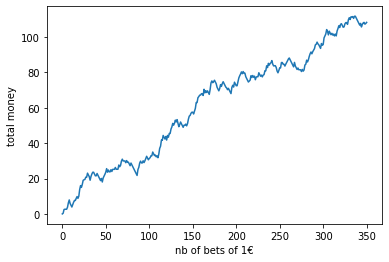

In [16]:
money = 0
bet_money = 0
Money = [0]

l = 5

n = len(data)

for k in range(30,n):
  bh,bd,ba = data.loc[k,"B365H"],data.loc[k,"B365D"],data.loc[k,"B365A"]
  pred = model.predict(X_train[k-30:k-29])
  predh,predd,preda = pred[0,0], pred[0,1], pred[0,2]
  if predh > 1/bh and bh < l:
    bet_money+=1
    if 0 == Y_train[k-30]:
      money += bh - 1
    else:
      money -= 1
  if predd > 1/bd and bd < l:
    bet_money+=1
    if 1 == Y_train[k-30]:
      money += bd - 1
    else:
      money -= 1
  if preda > 1/ba and ba < l:
    bet_money+=1
    if 2 == Y_train[k-30]:
      money += ba - 1
    else:
      money -= 1
  Money.append(money)

plt.plot([k for k in range(len(Money))],Money)
plt.xlabel('nb of bets of 1€')
plt.ylabel('total money')
plt.show()

Ajaccio VS Evian Thonon Gaillard;  Prono : 2 ; cote = 3.0 -> FAIL
Bastia VS St Etienne;  Prono : 2 ; cote = 3.1 -> OK
Brest VS Troyes;  Prono : 0 ; cote = 2.15 -> OK
Lorient VS Nancy;  Prono : 0 ; cote = 2.0 -> OK
Sochaux VS Montpellier;  Prono : 2 ; cote = 2.15 -> OK
Bordeaux VS Nice;  Prono : 0 ; cote = 1.62 -> FAIL
Lille VS Paris SG;  Prono : 0 ; cote = 2.7 -> FAIL
Reims VS Montpellier;  Prono : 1 ; cote = 3.0 -> FAIL
Evian Thonon Gaillard VS Bastia;  Prono : 0 ; cote = 2.3 -> OK
Nice VS Brest;  Prono : 0 ; cote = 2.0 -> OK
Troyes VS Lille;  Prono : 1 ; cote = 3.2 -> OK
Valenciennes VS Bordeaux;  Prono : 0 ; cote = 2.63 -> FAIL
Lyon VS Ajaccio;  Prono : 1 ; cote = 4.2 -> FAIL
Nancy VS Marseille;  Prono : 2 ; cote = 2.25 -> OK
Rennes VS Lorient;  Prono : 2 ; cote = 4.75 -> OK
Brest VS Valenciennes;  Prono : 0 ; cote = 2.7 -> OK
Reims VS Nancy;  Prono : 0 ; cote = 2.3 -> OK
Sochaux VS Troyes;  Prono : 0 ; cote = 2.2 -> OK
Toulouse VS Rennes;  Prono : 0 ; cote = 2.1 -> FAIL
Lille VS Ly

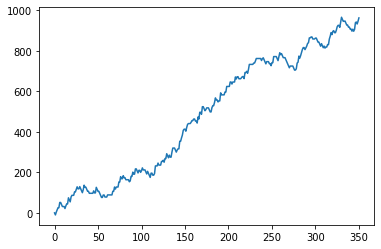

2290


In [17]:
money = 0
bet_money = 0
Money = [0]

l = 5

n = len(data)

for k in range(30,n):
  bh,bd,ba = data.loc[k,"B365H"],data.loc[k,"B365D"],data.loc[k,"B365A"]
  bet_list = [bh,bd,ba]
  nh,na = data.loc[k,"HomeTeam"], data.loc[k,"AwayTeam"]
  pred = model.predict(X_train[k-30:k-29])
  res = np.argmax(pred)
  if pred[0,res] > 1/bet_list[res] and bet_list[res] < l:
    money = money - 10
    bet_money += 10
    if res == Y_train[k-30]:
      money += bh*10
      print(nh+" VS "+na + ";  Prono : "+str(res)+ " ; cote = "+str(bet_list[res]) + " -> OK" )
    else:
      print(nh+" VS "+na + ";  Prono : "+str(res)+ " ; cote = "+str(bet_list[res]) + " -> FAIL" )
  Money.append(money)

plt.plot([k for k in range(len(Money))],Money)
plt.show()

print(bet_money)

## Saison 20-21

In [18]:
for x in Team_list:
  print(x.name)

Brest
Nancy
Troyes
Sochaux
Evian Thonon Gaillard
Ajaccio
Reims
Valenciennes
Rennes
Bastia
Toulouse
Bordeaux
Montpellier
Lorient
Lille
Nice
St Etienne
Lyon
Marseille
Paris SG


In [19]:
#importation des données, création de la classe Team

data = pd.read_csv ("/content/drive/MyDrive/data_foot/season17-18.csv", delimiter=",")

name_list = []

for k in range(370,380):
  name_list.append(data.loc[k,'HomeTeam'])
  name_list.append(data.loc[k,'AwayTeam'])


print(name_list)

Team_list = []

for name in name_list:
  x = Team(name)
  Team_list.append(x)

for k in range(len(data)):   #On remplit les victoires et défaites et le nombre de points à chaque journée pour chaque team
  result = data.loc[k,'FTR']
  home = find(data.loc[k,'HomeTeam'])
  away = find(data.loc[k,'AwayTeam'])
  if result == 'H':
    home.add_match('V')
    home.update_points(home.points[-1] + 3)
    away.add_match('D')
    away.update_points(away.points[-1])
  if result == 'A':
    home.add_match('D')
    home.update_points(home.points[-1])
    away.add_match('V')
    away.update_points(away.points[-1] + 3)
  if result == 'D':
    home.add_match('N')
    home.update_points(home.points[-1] + 1)
    away.add_match('N')
    away.update_points(away.points[-1] + 1)

def quick_sort(L,f):
  if L == []:
    return L
  elif len(L) == 1:
    return L
  else:
    p = L[0]
    L1 = []
    L2 = []
    for k in range(1,len(L)):
      if f(L[k]) > f(p):
        L2.append(L[k])
      else:
        L1.append(L[k])
    return quick_sort(L1,f)+[p]+quick_sort(L2,f)


for k in range(1,38):
  def points(x):
    return x.points[k]
  Team_list=quick_sort(Team_list,points)
  for i in range(20):
    Team_list[i].add_rank(20-i)

X_train = np.empty((350,10))
Y_train = np.empty(350)

start = 30

def transform(r):
  if r == "V":
    return 1
  elif r == "D":
    return -1
  else:
    return 0

for k in range(start,380):
  result = data.loc[k,'FTR']
  home = find(data.loc[k,'HomeTeam'])
  away = find(data.loc[k,'AwayTeam'])
  X_train[k-start,:5] = [home.rank[k//10-1],home.points[k//10],transform(home.matchs[k//10-3]),transform(home.matchs[k//10-2]),transform(home.matchs[k//10-1])]
  X_train[k-start,5:] = [away.rank[k//10-1],away.points[k//10],transform(away.matchs[k//10-3]),transform(away.matchs[k//10-2]),transform(away.matchs[k//10-1])]
  if result == "H":
    Y_train[k-start] = 0
  elif result == "D":
    Y_train[k-start] = 1
  else:
    Y_train[k-start] = 2

['Caen', 'Paris SG', 'Dijon', 'Angers', 'Lyon', 'Nice', 'Marseille', 'Amiens', 'Metz', 'Bordeaux', 'Nantes', 'Strasbourg', 'Rennes', 'Montpellier', 'St Etienne', 'Lille', 'Toulouse', 'Guingamp', 'Troyes', 'Monaco']


Metz VS Paris SG;  Prono : A ; cote = 1.13 -> OK
Montpellier VS Paris SG;  Prono : A ; cote = 1.17 -> FAIL
Dijon VS Paris SG;  Prono : A ; cote = 1.13 -> OK
Metz VS Marseille;  Prono : A ; cote = 1.5 -> OK
Monaco VS Rennes;  Prono : H ; cote = 1.39 -> OK
Lyon VS Paris SG;  Prono : A ; cote = 1.39 -> FAIL
Monaco VS Metz;  Prono : H ; cote = 1.33 -> OK
Nice VS St Etienne;  Prono : H ; cote = 1.57 -> OK
Lyon VS Rennes;  Prono : H ; cote = 1.5 -> FAIL
Lyon VS St Etienne;  Prono : H ; cote = 1.44 -> FAIL
Troyes VS Paris SG;  Prono : A ; cote = 1.28 -> OK
Marseille VS Nantes;  Prono : H ; cote = 1.53 -> FAIL
Lyon VS Caen;  Prono : H ; cote = 1.44 -> OK
Monaco VS Lille;  Prono : H ; cote = 1.28 -> OK
Nice VS Paris SG;  Prono : A ; cote = 1.33 -> OK
Lyon VS Toulouse;  Prono : H ; cote = 1.36 -> OK
St Etienne VS Paris SG;  Prono : A ; cote = 1.33 -> FAIL
Monaco VS Nantes;  Prono : H ; cote = 1.5 -> OK
Rennes VS Metz;  Prono : H ; cote = 1.44 -> FAIL
Marseille VS Lille;  Prono : H ; cote = 1.33 

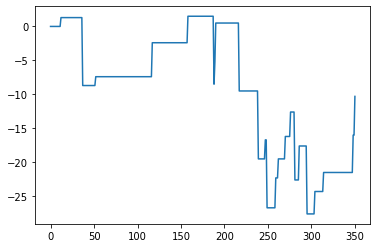

230


In [20]:
money = 0
bet_money = 0
Money = [0]

l = 1.6

n = len(data)

for k in range(30,n):
  bh,bd,ba = data.loc[k,"B365H"],data.loc[k,"B365D"],data.loc[k,"B365A"]
  nh,na = data.loc[k,"HomeTeam"], data.loc[k,"AwayTeam"]
  pred = model.predict(X_train[k-30:k-29])
  predh,predd,preda = pred[0,0], pred[0,1], pred[0,2]
  if predh > 1/bh and bh < l:
    money = money - 10
    bet_money += 10
    if 0 == Y_train[k-30]:
      money += bh*10
      print(nh+" VS "+na + ";  Prono : H ; cote = "+str(bh) + " -> OK" )
    else:
      print(nh+" VS "+na + ";  Prono : H ; cote = "+str(bh) + " -> FAIL" )
  if predd > 1/bd and bd < l:
    money = money - 10
    bet_money += 10
    if 1 == Y_train[k-30]:
      money += bd*10
      print(nh+" VS "+na + ";  Prono : D ; cote = "+str(bd) + " -> OK" )
    else:
      print(nh+" VS "+na + ";  Prono : D ; cote = "+str(bd) + " -> FAIL" )
  if preda > 1/ba and ba < l:
    money = money - 10
    bet_money += 10
    if 2 == Y_train[k-30]:
      money += ba*10
      print(nh+" VS "+na + ";  Prono : A ; cote = "+str(ba) + " -> OK" )
    else:
      print(nh+" VS "+na + ";  Prono : A ; cote = "+str(ba) + " -> FAIL" )
  Money.append(money)

plt.plot([k for k in range(len(Money))],Money)
plt.show()

print(bet_money)

Amiens VS Nice;  Prono : 0 ; cote = 3.3 -> OK
Caen VS Metz;  Prono : 2 ; cote = 4.75 -> FAIL
Dijon VS Montpellier;  Prono : 0 ; cote = 2.55 -> OK
Nantes VS Lyon;  Prono : 1 ; cote = 3.4 -> OK
Toulouse VS Rennes;  Prono : 2 ; cote = 3.4 -> FAIL
Angers VS Lille;  Prono : 0 ; cote = 2.25 -> FAIL
Guingamp VS Strasbourg;  Prono : 0 ; cote = 1.91 -> OK
Monaco VS Marseille;  Prono : 0 ; cote = 1.62 -> OK
Lille VS Bordeaux;  Prono : 1 ; cote = 3.3 -> OK
Metz VS Paris SG;  Prono : 2 ; cote = 1.13 -> OK
Nice VS Monaco;  Prono : 1 ; cote = 3.6 -> FAIL
Strasbourg VS Amiens;  Prono : 2 ; cote = 4.2 -> OK
Troyes VS Toulouse;  Prono : 2 ; cote = 2.6 -> FAIL
Marseille VS Rennes;  Prono : 0 ; cote = 1.67 -> FAIL
St Etienne VS Angers;  Prono : 2 ; cote = 3.75 -> FAIL
Toulouse VS Bordeaux;  Prono : 0 ; cote = 2.9 -> FAIL
Dijon VS St Etienne;  Prono : 1 ; cote = 3.2 -> FAIL
Guingamp VS Lille;  Prono : 0 ; cote = 2.15 -> OK
Nantes VS Caen;  Prono : 0 ; cote = 1.95 -> OK
Troyes VS Montpellier;  Prono : 0 ; 

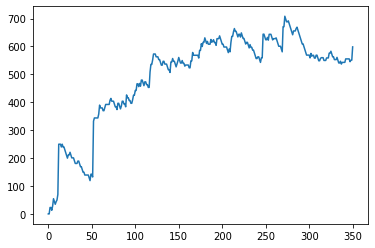

2200


In [21]:
money = 0
bet_money = 0
Money = [0]

l = 5

n = len(data)

for k in range(30,n):
  bh,bd,ba = data.loc[k,"B365H"],data.loc[k,"B365D"],data.loc[k,"B365A"]
  bet_list = [bh,bd,ba]
  nh,na = data.loc[k,"HomeTeam"], data.loc[k,"AwayTeam"]
  pred = model.predict(X_train[k-30:k-29])
  res = np.argmax(pred)
  if pred[0,res] > 1/bet_list[res] and bet_list[res]<l:
    money = money - 10
    bet_money += 10
    if res == Y_train[k-30]:
      money += bh*10
      print(nh+" VS "+na + ";  Prono : "+str(res)+ " ; cote = "+str(bet_list[res]) + " -> OK" )
    else:
      print(nh+" VS "+na + ";  Prono : "+str(res)+ " ; cote = "+str(bet_list[res]) + " -> FAIL" )
  Money.append(money)

plt.plot([k for k in range(len(Money))],Money)
plt.show()

print(bet_money)

# MEME CHOSE AVEC LIGA



In [22]:
#importation des données, création de la classe Team

data = pd.read_csv ("/content/drive/MyDrive/data_foot/SP1314.csv", delimiter=",")

name_list = []

for k in range(10):
  name_list.append(data.loc[k,'HomeTeam'])
  name_list.append(data.loc[k,'AwayTeam'])


Team_list = []

for name in name_list:
  x = Team(name)
  Team_list.append(x)

for k in range(len(data)):   #On remplit les victoires et défaites et le nombre de points à chaque journée pour chaque team
  result = data.loc[k,'FTR']
  home = find(data.loc[k,'HomeTeam'])
  away = find(data.loc[k,'AwayTeam'])
  if result == 'H':
    home.add_match('V')
    home.update_points(home.points[-1] + 3)
    away.add_match('D')
    away.update_points(away.points[-1])
  if result == 'A':
    home.add_match('D')
    home.update_points(home.points[-1])
    away.add_match('V')
    away.update_points(away.points[-1] + 3)
  if result == 'D':
    home.add_match('N')
    home.update_points(home.points[-1] + 1)
    away.add_match('N')
    away.update_points(away.points[-1] + 1)

def quick_sort(L,f):
  if L == []:
    return L
  elif len(L) == 1:
    return L
  else:
    p = L[0]
    L1 = []
    L2 = []
    for k in range(1,len(L)):
      if f(L[k]) > f(p):
        L2.append(L[k])
      else:
        L1.append(L[k])
    return quick_sort(L1,f)+[p]+quick_sort(L2,f)


for k in range(1,38):
  def points(x):
    return x.points[k]
  Team_list=quick_sort(Team_list,points)
  for i in range(20):
    Team_list[i].add_rank(20-i)

X_train = np.empty((350,10))
Y_train = np.empty(350)

start = 30

def transform(r):
  if r == "V":
    return 1
  elif r == "D":
    return -1
  else:
    return 0

for k in range(start,380):
  result = data.loc[k,'FTR']
  home = find(data.loc[k,'HomeTeam'])
  away = find(data.loc[k,'AwayTeam'])
  X_train[k-start,:5] = [home.rank[k//10-1],home.points[k//10],transform(home.matchs[k//10-3]),transform(home.matchs[k//10-2]),transform(home.matchs[k//10-1])]
  X_train[k-start,5:] = [away.rank[k//10-1],away.points[k//10],transform(away.matchs[k//10-3]),transform(away.matchs[k//10-2]),transform(away.matchs[k//10-1])]
  if result == "H":
    Y_train[k-start] = 0
  elif result == "D":
    Y_train[k-start] = 1
  else:
    Y_train[k-start] = 2

X = np.copy(X_train)
Y = np.copy(Y_train)


In [23]:
#importation des données, création de la classe Team

data = pd.read_csv ("/content/drive/MyDrive/data_foot/SP1415.csv", delimiter=",")

name_list = []

for k in range(10):
  name_list.append(data.loc[k,'HomeTeam'])
  name_list.append(data.loc[k,'AwayTeam'])


Team_list = []

for name in name_list:
  x = Team(name)
  Team_list.append(x)

for k in range(len(data)):   #On remplit les victoires et défaites et le nombre de points à chaque journée pour chaque team
  result = data.loc[k,'FTR']
  home = find(data.loc[k,'HomeTeam'])
  away = find(data.loc[k,'AwayTeam'])
  if result == 'H':
    home.add_match('V')
    home.update_points(home.points[-1] + 3)
    away.add_match('D')
    away.update_points(away.points[-1])
  if result == 'A':
    home.add_match('D')
    home.update_points(home.points[-1])
    away.add_match('V')
    away.update_points(away.points[-1] + 3)
  if result == 'D':
    home.add_match('N')
    home.update_points(home.points[-1] + 1)
    away.add_match('N')
    away.update_points(away.points[-1] + 1)

def quick_sort(L,f):
  if L == []:
    return L
  elif len(L) == 1:
    return L
  else:
    p = L[0]
    L1 = []
    L2 = []
    for k in range(1,len(L)):
      if f(L[k]) > f(p):
        L2.append(L[k])
      else:
        L1.append(L[k])
    return quick_sort(L1,f)+[p]+quick_sort(L2,f)


for k in range(1,38):
  def points(x):
    return x.points[k]
  Team_list=quick_sort(Team_list,points)
  for i in range(20):
    Team_list[i].add_rank(20-i)

X_train = np.empty((350,10))
Y_train = np.empty(350)

start = 30

def transform(r):
  if r == "V":
    return 1
  elif r == "D":
    return -1
  else:
    return 0

for k in range(start,380):
  result = data.loc[k,'FTR']
  home = find(data.loc[k,'HomeTeam'])
  away = find(data.loc[k,'AwayTeam'])
  X_train[k-start,:5] = [home.rank[k//10-1],home.points[k//10],transform(home.matchs[k//10-3]),transform(home.matchs[k//10-2]),transform(home.matchs[k//10-1])]
  X_train[k-start,5:] = [away.rank[k//10-1],away.points[k//10],transform(away.matchs[k//10-3]),transform(away.matchs[k//10-2]),transform(away.matchs[k//10-1])]
  if result == "H":
    Y_train[k-start] = 0
  elif result == "D":
    Y_train[k-start] = 1
  else:
    Y_train[k-start] = 2

X = np.concatenate((X,X_train),axis = 0)
Y = np.concatenate((Y,Y_train),axis = 0)

In [24]:
#importation des données, création de la classe Team

data = pd.read_csv ("/content/drive/MyDrive/data_foot/SP1516.csv", delimiter=",")

name_list = []

for k in range(10):
  name_list.append(data.loc[k,'HomeTeam'])
  name_list.append(data.loc[k,'AwayTeam'])


Team_list = []

for name in name_list:
  x = Team(name)
  Team_list.append(x)

for k in range(len(data)):   #On remplit les victoires et défaites et le nombre de points à chaque journée pour chaque team
  result = data.loc[k,'FTR']
  home = find(data.loc[k,'HomeTeam'])
  away = find(data.loc[k,'AwayTeam'])
  if result == 'H':
    home.add_match('V')
    home.update_points(home.points[-1] + 3)
    away.add_match('D')
    away.update_points(away.points[-1])
  if result == 'A':
    home.add_match('D')
    home.update_points(home.points[-1])
    away.add_match('V')
    away.update_points(away.points[-1] + 3)
  if result == 'D':
    home.add_match('N')
    home.update_points(home.points[-1] + 1)
    away.add_match('N')
    away.update_points(away.points[-1] + 1)

def quick_sort(L,f):
  if L == []:
    return L
  elif len(L) == 1:
    return L
  else:
    p = L[0]
    L1 = []
    L2 = []
    for k in range(1,len(L)):
      if f(L[k]) > f(p):
        L2.append(L[k])
      else:
        L1.append(L[k])
    return quick_sort(L1,f)+[p]+quick_sort(L2,f)


for k in range(1,38):
  def points(x):
    return x.points[k]
  Team_list=quick_sort(Team_list,points)
  for i in range(20):
    Team_list[i].add_rank(20-i)

X_train = np.empty((350,10))
Y_train = np.empty(350)

start = 30

def transform(r):
  if r == "V":
    return 1
  elif r == "D":
    return -1
  else:
    return 0

for k in range(start,380):
  result = data.loc[k,'FTR']
  home = find(data.loc[k,'HomeTeam'])
  away = find(data.loc[k,'AwayTeam'])
  X_train[k-start,:5] = [home.rank[k//10-1],home.points[k//10],transform(home.matchs[k//10-3]),transform(home.matchs[k//10-2]),transform(home.matchs[k//10-1])]
  X_train[k-start,5:] = [away.rank[k//10-1],away.points[k//10],transform(away.matchs[k//10-3]),transform(away.matchs[k//10-2]),transform(away.matchs[k//10-1])]
  if result == "H":
    Y_train[k-start] = 0
  elif result == "D":
    Y_train[k-start] = 1
  else:
    Y_train[k-start] = 2

X = np.concatenate((X,X_train),axis = 0)
Y = np.concatenate((Y,Y_train),axis = 0)

In [25]:
#importation des données, création de la classe Team

data = pd.read_csv ("/content/drive/MyDrive/data_foot/SP1617.csv", delimiter=",")

name_list = []

for k in range(10):
  name_list.append(data.loc[k,'HomeTeam'])
  name_list.append(data.loc[k,'AwayTeam'])


Team_list = []

for name in name_list:
  x = Team(name)
  Team_list.append(x)

for k in range(len(data)):   #On remplit les victoires et défaites et le nombre de points à chaque journée pour chaque team
  result = data.loc[k,'FTR']
  home = find(data.loc[k,'HomeTeam'])
  away = find(data.loc[k,'AwayTeam'])
  if result == 'H':
    home.add_match('V')
    home.update_points(home.points[-1] + 3)
    away.add_match('D')
    away.update_points(away.points[-1])
  if result == 'A':
    home.add_match('D')
    home.update_points(home.points[-1])
    away.add_match('V')
    away.update_points(away.points[-1] + 3)
  if result == 'D':
    home.add_match('N')
    home.update_points(home.points[-1] + 1)
    away.add_match('N')
    away.update_points(away.points[-1] + 1)

def quick_sort(L,f):
  if L == []:
    return L
  elif len(L) == 1:
    return L
  else:
    p = L[0]
    L1 = []
    L2 = []
    for k in range(1,len(L)):
      if f(L[k]) > f(p):
        L2.append(L[k])
      else:
        L1.append(L[k])
    return quick_sort(L1,f)+[p]+quick_sort(L2,f)


for k in range(1,38):
  def points(x):
    return x.points[k]
  Team_list=quick_sort(Team_list,points)
  for i in range(20):
    Team_list[i].add_rank(20-i)

X_train = np.empty((350,10))
Y_train = np.empty(350)

start = 30

def transform(r):
  if r == "V":
    return 1
  elif r == "D":
    return -1
  else:
    return 0

for k in range(start,380):
  result = data.loc[k,'FTR']
  home = find(data.loc[k,'HomeTeam'])
  away = find(data.loc[k,'AwayTeam'])
  X_train[k-start,:5] = [home.rank[k//10-1],home.points[k//10],transform(home.matchs[k//10-3]),transform(home.matchs[k//10-2]),transform(home.matchs[k//10-1])]
  X_train[k-start,5:] = [away.rank[k//10-1],away.points[k//10],transform(away.matchs[k//10-3]),transform(away.matchs[k//10-2]),transform(away.matchs[k//10-1])]
  if result == "H":
    Y_train[k-start] = 0
  elif result == "D":
    Y_train[k-start] = 1
  else:
    Y_train[k-start] = 2

X = np.concatenate((X,X_train),axis = 0)
Y = np.concatenate((Y,Y_train),axis = 0)

In [26]:
#importation des données, création de la classe Team

data = pd.read_csv ("/content/drive/MyDrive/data_foot/SP1718.csv", delimiter=",")

name_list = []

for k in range(10):
  name_list.append(data.loc[k,'HomeTeam'])
  name_list.append(data.loc[k,'AwayTeam'])


Team_list = []

for name in name_list:
  x = Team(name)
  Team_list.append(x)

for k in range(len(data)):   #On remplit les victoires et défaites et le nombre de points à chaque journée pour chaque team
  result = data.loc[k,'FTR']
  home = find(data.loc[k,'HomeTeam'])
  away = find(data.loc[k,'AwayTeam'])
  if result == 'H':
    home.add_match('V')
    home.update_points(home.points[-1] + 3)
    away.add_match('D')
    away.update_points(away.points[-1])
  if result == 'A':
    home.add_match('D')
    home.update_points(home.points[-1])
    away.add_match('V')
    away.update_points(away.points[-1] + 3)
  if result == 'D':
    home.add_match('N')
    home.update_points(home.points[-1] + 1)
    away.add_match('N')
    away.update_points(away.points[-1] + 1)

def quick_sort(L,f):
  if L == []:
    return L
  elif len(L) == 1:
    return L
  else:
    p = L[0]
    L1 = []
    L2 = []
    for k in range(1,len(L)):
      if f(L[k]) > f(p):
        L2.append(L[k])
      else:
        L1.append(L[k])
    return quick_sort(L1,f)+[p]+quick_sort(L2,f)


for k in range(1,38):
  def points(x):
    return x.points[k]
  Team_list=quick_sort(Team_list,points)
  for i in range(20):
    Team_list[i].add_rank(20-i)

X_train = np.empty((350,10))
Y_train = np.empty(350)

start = 30

def transform(r):
  if r == "V":
    return 1
  elif r == "D":
    return -1
  else:
    return 0

for k in range(start,380):
  result = data.loc[k,'FTR']
  home = find(data.loc[k,'HomeTeam'])
  away = find(data.loc[k,'AwayTeam'])
  X_train[k-start,:5] = [home.rank[k//10-1],home.points[k//10],transform(home.matchs[k//10-3]),transform(home.matchs[k//10-2]),transform(home.matchs[k//10-1])]
  X_train[k-start,5:] = [away.rank[k//10-1],away.points[k//10],transform(away.matchs[k//10-3]),transform(away.matchs[k//10-2]),transform(away.matchs[k//10-1])]
  if result == "H":
    Y_train[k-start] = 0
  elif result == "D":
    Y_train[k-start] = 1
  else:
    Y_train[k-start] = 2

X = np.concatenate((X,X_train),axis = 0)
Y = np.concatenate((Y,Y_train),axis = 0)

In [27]:
model_L2 = tf.keras.models.Sequential([
   tf.keras.Input(shape=(10,)),
   tf.keras.layers.Dense(15, activation='relu'),
   tf.keras.layers.Dense(15, activation='relu'),
   tf.keras.layers.Dense(3),
   tf.keras.layers.Softmax() 
])

model_L2.compile(
    optimizer=tf.keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

print("Fit model on training data")
history = model_L2.fit(
    X,
    Y,
    batch_size=50,
    epochs=1000,)

Fit model on training data
Epoch 1/1000
35/35 [==============================] - 1s 1ms/step - loss: 1.7569 - sparse_categorical_accuracy: 0.3771
Epoch 2/1000
35/35 [==============================] - 0s 1ms/step - loss: 1.0491 - sparse_categorical_accuracy: 0.5051
Epoch 3/1000
35/35 [==============================] - 0s 1ms/step - loss: 1.0124 - sparse_categorical_accuracy: 0.5297
Epoch 4/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.9965 - sparse_categorical_accuracy: 0.5246
Epoch 5/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.9910 - sparse_categorical_accuracy: 0.5309
Epoch 6/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.9842 - sparse_categorical_accuracy: 0.5326
Epoch 7/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.9798 - sparse_categorical_accuracy: 0.5337
Epoch 8/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.9751 - sparse_categorical_accuracy: 0.5411
Epoch 9/1000
35/35 [=

In [28]:
#importation des données, création de la classe Team

data = pd.read_csv ("/content/drive/MyDrive/data_foot/SP1819.csv", delimiter=",")

name_list = []

for k in range(10):
  name_list.append(data.loc[k,'HomeTeam'])
  name_list.append(data.loc[k,'AwayTeam'])


Team_list = []

for name in name_list:
  x = Team(name)
  Team_list.append(x)

for k in range(len(data)):   #On remplit les victoires et défaites et le nombre de points à chaque journée pour chaque team
  result = data.loc[k,'FTR']
  home = find(data.loc[k,'HomeTeam'])
  away = find(data.loc[k,'AwayTeam'])
  if result == 'H':
    home.add_match('V')
    home.update_points(home.points[-1] + 3)
    away.add_match('D')
    away.update_points(away.points[-1])
  if result == 'A':
    home.add_match('D')
    home.update_points(home.points[-1])
    away.add_match('V')
    away.update_points(away.points[-1] + 3)
  if result == 'D':
    home.add_match('N')
    home.update_points(home.points[-1] + 1)
    away.add_match('N')
    away.update_points(away.points[-1] + 1)

def quick_sort(L,f):
  if L == []:
    return L
  elif len(L) == 1:
    return L
  else:
    p = L[0]
    L1 = []
    L2 = []
    for k in range(1,len(L)):
      if f(L[k]) > f(p):
        L2.append(L[k])
      else:
        L1.append(L[k])
    return quick_sort(L1,f)+[p]+quick_sort(L2,f)


for k in range(1,38):
  def points(x):
    return x.points[k]
  Team_list=quick_sort(Team_list,points)
  for i in range(20):
    Team_list[i].add_rank(20-i)

X_train = np.empty((350,10))
Y_train = np.empty(350)

start = 30

def transform(r):
  if r == "V":
    return 1
  elif r == "D":
    return -1
  else:
    return 0

for k in range(start,380):
  result = data.loc[k,'FTR']
  home = find(data.loc[k,'HomeTeam'])
  away = find(data.loc[k,'AwayTeam'])
  X_train[k-start,:5] = [home.rank[k//10-1],home.points[k//10],transform(home.matchs[k//10-3]),transform(home.matchs[k//10-2]),transform(home.matchs[k//10-1])]
  X_train[k-start,5:] = [away.rank[k//10-1],away.points[k//10],transform(away.matchs[k//10-3]),transform(away.matchs[k//10-2]),transform(away.matchs[k//10-1])]
  if result == "H":
    Y_train[k-start] = 0
  elif result == "D":
    Y_train[k-start] = 1
  else:
    Y_train[k-start] = 2


In [29]:
print("Evaluate on test data")
results = model_L2.evaluate(X_train, Y_train, batch_size=1)
print("test loss, test acc:", results)

Evaluate on test data
350/350 [==============================] - 0s 975us/step - loss: 1.2135 - sparse_categorical_accuracy: 0.4029
test loss, test acc: [1.2134560346603394, 0.4028571546077728]


Ath Madrid VS Eibar;  Prono : 0 ; cote = 1.36 -> FAIL
Sociedad VS Barcelona;  Prono : 2 ; cote = 1.4 -> OK
Sevilla VS Getafe;  Prono : 0 ; cote = 1.55 -> FAIL
Valladolid VS Alaves;  Prono : 0 ; cote = 2.2 -> FAIL
Girona VS Celta;  Prono : 0 ; cote = 2.4 -> OK
Huesca VS Sociedad;  Prono : 2 ; cote = 2.1 -> OK
Celta VS Valladolid;  Prono : 0 ; cote = 1.75 -> FAIL
Betis VS Ath Bilbao;  Prono : 0 ; cote = 2.14 -> FAIL
Ath Bilbao VS Villarreal;  Prono : 0 ; cote = 2.25 -> FAIL
Barcelona VS Ath Bilbao;  Prono : 0 ; cote = 1.16 -> FAIL
Real Madrid VS Ath Madrid;  Prono : 0 ; cote = 2.0 -> FAIL
Sociedad VS Valencia;  Prono : 0 ; cote = 2.2 -> FAIL
Leganes VS Vallecano;  Prono : 0 ; cote = 2.0 -> OK
Espanol VS Villarreal;  Prono : 0 ; cote = 2.25 -> OK
Sevilla VS Celta;  Prono : 0 ; cote = 1.53 -> OK
Valladolid VS Huesca;  Prono : 0 ; cote = 1.9 -> OK
Levante VS Leganes;  Prono : 0 ; cote = 2.1 -> OK
Barcelona VS Real Madrid;  Prono : 0 ; cote = 1.95 -> OK
Getafe VS Betis;  Prono : 0 ; cote = 2

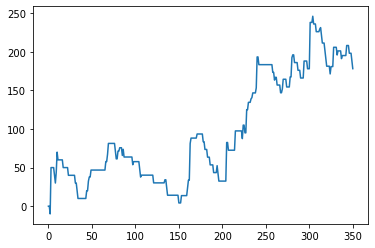

1020


In [30]:
money = 0
bet_money = 0
Money = [0]

l = 2.5

n = len(data)

for k in range(30,n):
  bh,bd,ba = data.loc[k,"B365H"],data.loc[k,"B365D"],data.loc[k,"B365A"]
  bet_list = [bh,bd,ba]
  nh,na = data.loc[k,"HomeTeam"], data.loc[k,"AwayTeam"]
  pred = model_L2.predict(X_train[k-30:k-29])
  res = np.argmax(pred)
  if pred[0,res] > 1/bet_list[res] and bet_list[res]<l:
    money = money - 10
    bet_money += 10
    if res == Y_train[k-30]:
      money += bh*10
      print(nh+" VS "+na + ";  Prono : "+str(res)+ " ; cote = "+str(bet_list[res]) + " -> OK" )
    else:
      print(nh+" VS "+na + ";  Prono : "+str(res)+ " ; cote = "+str(bet_list[res]) + " -> FAIL" )
  Money.append(money)

plt.plot([k for k in range(len(Money))],Money)
plt.show()

print(bet_money)

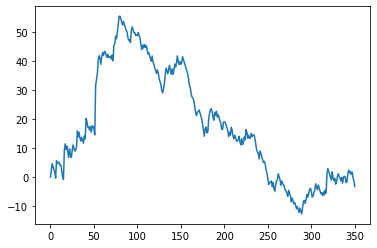

487


In [31]:
money = 0
bet_money = 0
Money = [0]

l = 20

n = len(data)

for k in range(30,n):
  bh,bd,ba = data.loc[k,"B365H"],data.loc[k,"B365D"],data.loc[k,"B365A"]
  pred = model.predict(X_train[k-30:k-29])
  predh,predd,preda = pred[0,0], pred[0,1], pred[0,2]
  if predh > 1/bh and bh < l:
    bet_money+=1
    if 0 == Y_train[k-30]:
      money += bh - 1
    else:
      money -= 1
  if predd > 1/bd and bd < l:
    bet_money+=1
    if 1 == Y_train[k-30]:
      money += bd - 1
    else:
      money -= 1
  if preda > 1/ba and ba < l:
    bet_money+=1
    if 2 == Y_train[k-30]:
      money += ba - 1
    else:
      money -= 1
  Money.append(money)

plt.plot([k for k in range(len(Money))],Money)
plt.show()

print(bet_money)